In [1]:
import requests
from bs4 import BeautifulSoup
import re
from collections import Counter      # counter (dict形式）
import threading
import time



In [5]:
#########  每個標題頁 def
host = 'https://www.518.com.tw'
links_al = []
def getlink(i):
    res = requests.get(host+'/job-index-P-'+str(i)+'.html?i=1&am=1&ab=2032001')    # '下一頁'組合
    soup = BeautifulSoup(res.text,'lxml')
    links = soup.select('li.title > a')                  # 每一頁的 '標題頁'連結
    for link in links :                                  # '標題頁'連結 取出
            l = link['href']
            links_al.append(l)       

In [129]:
#########  每個標題頁thread
class getlinkThread(threading.Thread):    
    def __init__(self,link):
        threading.Thread.__init__(self)
        self.link = link
    def run(self):               # run getlink 的方法 裡面的 link['href']
        getlink(self.link)

In [130]:
######### 內文 def
def getinner(inner):
    
    res = requests.get(inner)
    soup = BeautifulSoup(res.text,'lxml')
    try:
        line1 = soup.select_one('div.JobDescription > p').text   # 工作內容 
        line2 = soup.select_one('div.job-detail-box > dl').text  # 擅長工具
        line3 = line1 + line2                                    # list 合併
        up = line3.upper()                                       # 統一轉為大寫處理
        line = re.findall('[A-Z]+[+#-C]*',"%s" %up)              # 找正規化後的字串
        

        line_c = []                       # 給他有一個排序的位置放
        for line_check in line:           # 將'正規化'好的 line 放入自定義的 line_check
            if line_check not in line_c:  # 將不再line_check 的英文單字放入line_c(為了不讓值重複)
                line_c.append(line_check)

                
        for language in line_c :     # 把整理好的line_c 值取出到自定義的 language (list形式)
            global wc                # 全域變數
            if language in wc :      # 如果 lines 的東西有在 wc
                wc[language] +=1     # wc  就+1
#             else:                  # 取消是因為有自行建立字典會在裡面篩選
#                 wc[lines] = 1      # 不然就初值為1
      
    except:
        #print(url)              # print 出有問題的網頁
        pass                     # 有些網頁有問題跳過所以pass  

In [131]:
######### 內文thread
class getinnerThread(threading.Thread):
    def __init__(self,inner):
        threading.Thread.__init__(self)
        self.inner = inner
    def run(self):                       # run inner
        getinner(self.inner)

In [132]:
wc = Counter()             # local variable 'wc' referenced before assignment  要注意區域變數問題！！！  不能放在迴圈
wc["C"]=0                  # 自行建立字典過濾非必要的單字
wc["C++"]=0
wc["C#"]=0
wc["PYTHON"]=0
wc["JAVA"]=0
wc["JAVASCRIPT"]=0
wc["PHP"]=0
wc["HTML"]=0
wc["SQL"]=0
wc["CSS"]=0
wc["R"]=0
wc["CSS"]=0
wc["BASH"]=0
wc["RUBY"]=0
wc["PERL"]=0
wc["SCALA"]=0
wc["SWIFT"]=0
wc["GO"]=0
wc["DELPHI"]=0
wc["TYPESCRIPT"]=0


threads = []                        # 標題頁
for i in range(1,45):               # 頁數
    Thread = getlinkThread(i)       # 載入頁數中的標題頁
    threads.append(Thread)          # 裝到list裡面
for i in threads:                   # 跑
    i.start()
    time.sleep(0.1)
for i in threads:                   # 等star動作結束在繼續下一步
    i.join()
        
threadinner = []                       #   內文頁
for inner in links_al:                 #  '標題頁links_al' 裡的內文
    Thread = getinnerThread(inner)     # 
    threadinner.append(Thread)
for i in threadinner:
    i.start()
    time.sleep(0.1)
for i in threadinner:
    i.join()
    
    


[('JAVA', 231),
 ('PHP', 194),
 ('HTML', 191),
 ('SQL', 176),
 ('CSS', 136),
 ('JAVASCRIPT', 110),
 ('C#', 81),
 ('C++', 62),
 ('C', 33),
 ('PYTHON', 10),
 ('PERL', 8),
 ('SWIFT', 8),
 ('DELPHI', 5),
 ('R', 3),
 ('RUBY', 3),
 ('GO', 2),
 ('BASH', 0),
 ('SCALA', 0),
 ('TYPESCRIPT', 0)]

In [151]:

with open ('lanaugle_langs.csv','w') as fw:   # 寫入檔案

    for lang,counts in wc.most_common():
        fw.write('{},{}\n'.format(lang,counts))
wc.most_common()

[('JAVA', 231),
 ('PHP', 194),
 ('HTML', 191),
 ('SQL', 176),
 ('CSS', 136),
 ('JAVASCRIPT', 110),
 ('C#', 81),
 ('C++', 62),
 ('C', 33),
 ('PYTHON', 10),
 ('PERL', 8),
 ('SWIFT', 8),
 ('DELPHI', 5),
 ('R', 3),
 ('RUBY', 3),
 ('GO', 2),
 ('BASH', 0),
 ('SCALA', 0),
 ('TYPESCRIPT', 0)]

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import OrderedDict

In [168]:
mydata = pd.read_csv('lanaugle_langs.csv')

In [153]:
mydata.head()

,JAVA,231
0,PHP,194
1,HTML,191
2,SQL,176
3,CSS,136
4,JAVASCRIPT,110


In [155]:
language = OrderedDict(wc.most_common())
language

OrderedDict([('JAVA', 231),
             ('PHP', 194),
             ('HTML', 191),
             ('SQL', 176),
             ('CSS', 136),
             ('JAVASCRIPT', 110),
             ('C#', 81),
             ('C++', 62),
             ('C', 33),
             ('PYTHON', 10),
             ('PERL', 8),
             ('SWIFT', 8),
             ('DELPHI', 5),
             ('R', 3),
             ('RUBY', 3),
             ('GO', 2),
             ('BASH', 0),
             ('SCALA', 0),
             ('TYPESCRIPT', 0)])

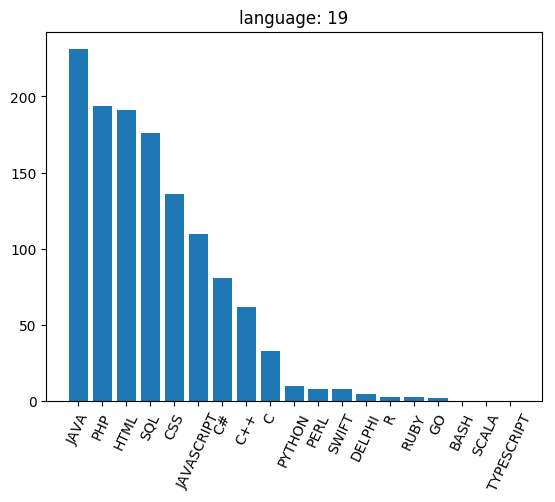

In [166]:
xticks = np.arange(len(language)) 
plt.xticks(xticks, list(language.keys()))  # 預設 X 座標數字，改顯示水果名
plt.bar(xticks,language.values(),align = 'center')
plt.xticks(rotation = 65)                  #選轉角度
plt.title("language: %d" % len(language))  # 給標題
plt.show() 

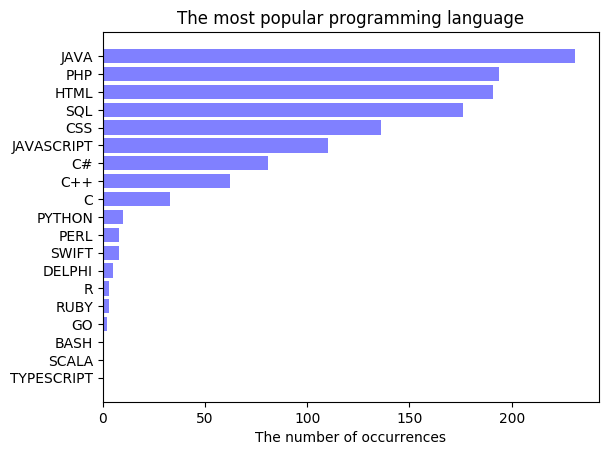

In [160]:
plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(language))
performance = list(language.values())
error = np.random.rand(len(language))

ax.barh(y_pos, performance, align='center',color='#8080ff')
ax.set_yticks(y_pos)
ax.set_yticklabels(language)
ax.invert_yaxis()  
ax.set_xlabel('The number of occurrences')
ax.set_title('The most popular programming language')

plt.show()

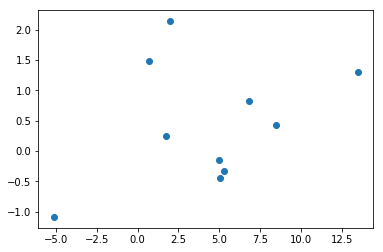

In [192]:
import numpy as np
import matplotlib.pyplot as plt

language = 20
X = np.random.normal(1,5,n)
Y = np.random.normal(1,1,n)

plt.scatter(X,Y)
plt.show()

NameError: name 'xlim' is not defined

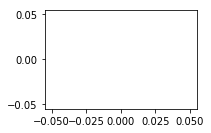

In [191]:
%matplotlib inline
x = np.arange(2.0,1.2,6.2)
y1 = np.sin(x)

plt.figure(1)
plt.subplot(221)
plt.plot(x,y1)

plt.subplot(221)
xlim(-2.5,5.5)
ylm(1,-1)
plt.plot(x,y1)




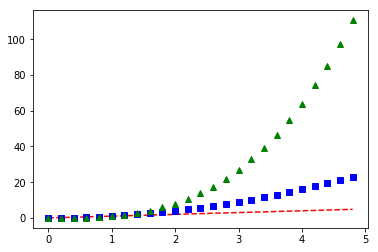

In [193]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5 , 0.2)
# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')  #-- (虛線)
plt.show()